# Import Libs

In [87]:
from pyspark.sql import SparkSession
import pandas as pd

# Create SparkSession object

In [145]:
# SparkSession 객체 생성
spark = SparkSession\
        .builder\
        .appName('Database2')\
        .config("spark.sql.codegen.wholeStage", "false")  \
        .getOrCreate()
print("Spark Version:", spark.version)


Spark Version: 3.5.0


# Read File & Check

In [161]:
file_path = "/Users/ijiyun/PycharmProjects/Hadoop/manhattan2021.xlsx"
df = pd.read_excel(file_path)
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,22756.0,22756.000000,22756.000000,0.0,22756.000000,11657.000000,2599.000000,12470.000000,1786.000000,1.786000e+03,20422.000000,22756.000000,2.275600e+04,22756
mean,1.0,1094.599490,748.266699,NaN,10030.668527,2.665523,2.126972,2.935044,6276.900896,3.275932e+04,1955.437322,2.094525,3.021417e+06,2021-07-17 04:44:19.026190848
min,1.0,7.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1800.000000,1.000000,0.000000e+00,2021-01-01 00:00:00
25%,1.0,721.000000,29.000000,NaN,10013.000000,1.000000,0.000000,1.000000,1799.000000,3.641000e+03,1923.000000,2.000000,4.620000e+05,2021-04-28 00:00:00
50%,1.0,1158.000000,1003.000000,NaN,10022.000000,1.000000,1.000000,1.000000,2332.500000,6.432000e+03,1958.000000,2.000000,9.650000e+05,2021-07-22 00:00:00
75%,1.0,1448.000000,1203.000000,NaN,10028.000000,1.000000,1.000000,1.000000,4927.000000,1.498475e+04,1987.000000,2.000000,2.137500e+06,2021-10-08 00:00:00
max,1.0,2250.000000,9114.000000,NaN,10463.000000,417.000000,259.000000,420.000000,659375.000000,2.400000e+06,2021.000000,4.000000,1.033000e+09,2021-12-31 00:00:00
std,0.0,523.643375,894.544386,NaN,37.827830,11.730870,11.530962,12.683749,24279.253433,1.215003e+05,38.339297,0.489471,1.566200e+07,NaN


# Confirm NULL

In [162]:
null_counts = df.isnull().sum()
print(null_counts)

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                  20
BLOCK                                  0
LOT                                    0
EASE-MENT                          22756
BUILDING CLASS AT PRESENT             20
ADDRESS                                0
APARTMENT NUMBER                   12059
ZIP CODE                               0
RESIDENTIAL\nUNITS                 11099
COMMERCIAL\nUNITS                  20157
TOTAL \nUNITS                      10286
LAND \nSQUARE FEET                 20970
GROSS \nSQUARE FEET                20970
YEAR BUILT                          2334
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS\nAT TIME OF SALE        0
SALE PRICE                             0
SALE DATE                              0
dtype: int64


# List Unselected Columns

In [163]:
# 불필요한 column 정의
unselected = ["Borough", "Ease-ment", "Address", "Zip Code", "Land Square Feet", "Gross Square Feet"]
unselected = [word.upper() for word in unselected]
print(unselected)

['BOROUGH', 'EASE-MENT', 'ADDRESS', 'ZIP CODE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']


# Create Spark DataFrame & List Selected Columns

In [164]:
spark_df = spark.createDataFrame(df)
selected = []
for c in spark_df.columns:
    if c.upper() not in unselected:
        selected.append(c)
print(selected)

/Users/ijiyun/PycharmProjects/Hadoop/venv/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE', 'SALE PRICE', 'SALE DATE']


# Check the columns

In [165]:
df = spark_df.select(*selected)
df.printSchema()

root
 |-- NEIGHBORHOOD: string (nullable = true)
 |-- BUILDING CLASS CATEGORY: string (nullable = true)
 |-- TAX CLASS AT PRESENT: string (nullable = true)
 |-- BLOCK: long (nullable = true)
 |-- LOT: long (nullable = true)
 |-- BUILDING CLASS AT PRESENT: string (nullable = true)
 |-- APARTMENT NUMBER: string (nullable = true)
 |-- RESIDENTIAL\nUNITS: double (nullable = true)
 |-- COMMERCIAL\nUNITS: double (nullable = true)
 |-- TOTAL \nUNITS: double (nullable = true)
 |-- LAND \nSQUARE FEET: double (nullable = true)
 |-- GROSS \nSQUARE FEET: double (nullable = true)
 |-- YEAR BUILT: double (nullable = true)
 |-- TAX CLASS AT TIME OF SALE: long (nullable = true)
 |-- BUILDING CLASS\nAT TIME OF SALE: string (nullable = true)
 |-- SALE PRICE: long (nullable = true)
 |-- SALE DATE: timestamp (nullable = true)



# Import Libs

In [168]:
import pyspark.sql.functions as sFunc
from pyspark.sql.types import *

# Data Preprocessing
1. SALE PRICE 정수 맞추기
    - Cast the sale prices to Integers
2. 불규칙 판매 데이터 제외 (ex. 소유권 이전)
    - Exclude irregular sales data. For example, a $0 sale indicates an ownership transfer without cash consideration.

In [183]:
df = df.withColumn(
    "SALE PRICE", sFunc.regexp_replace("SALE PRICE", "[$,]", "").cast(IntegerType())
)
df = df.select("*").where(
    '`SALE PRICE` > 0 and `TOTAL \nUNITS` > 0 and `GROSS \nSQUARE FEET` > 0'
)

In [184]:
# Monthly
monthly_sale_df = df.select(
    "SALE PRICE",
    "TOTAL \nUNITS",
    "GROSS \nSQUARE FEET",
    sFunc.date_format("SALE DATE", "yyyy-MM").alias("month"),
)

In [185]:
display(df)

DataFrame[NEIGHBORHOOD: string, BUILDING CLASS CATEGORY: string, TAX CLASS AT PRESENT: string, BLOCK: bigint, LOT: bigint, BUILDING CLASS AT PRESENT: string, APARTMENT NUMBER: string, RESIDENTIAL
UNITS: double, COMMERCIAL
UNITS: double, TOTAL 
UNITS: double, LAND 
SQUARE FEET: double, GROSS 
SQUARE FEET: double, YEAR BUILT: double, TAX CLASS AT TIME OF SALE: bigint, BUILDING CLASS
AT TIME OF SALE: string, SALE PRICE: int, SALE DATE: timestamp]

In [186]:
summary_df = (
    monthly_sale_df.groupBy("month")
    .agg(
        sFunc.sum("SALE PRICE").alias("total_sales"),
        sFunc.sum("TOTAL \nUNITS").alias("units"),
        sFunc.sum("GROSS \nSQUARE FEET").alias("square_feet"),
    )
    .orderBy("month")
)

In [187]:
display(summary_df)

DataFrame[month: string, total_sales: bigint, units: double, square_feet: double]

# Visualization

In [188]:
# sparkDataFrame to Pandas DataFrame
df_pandas = summary_df.toPandas()

# 거래 동향 (Trading Trends)
 봄 ~ 가을에 구매가 이루어짐 (Purchases are made from spring to fall )

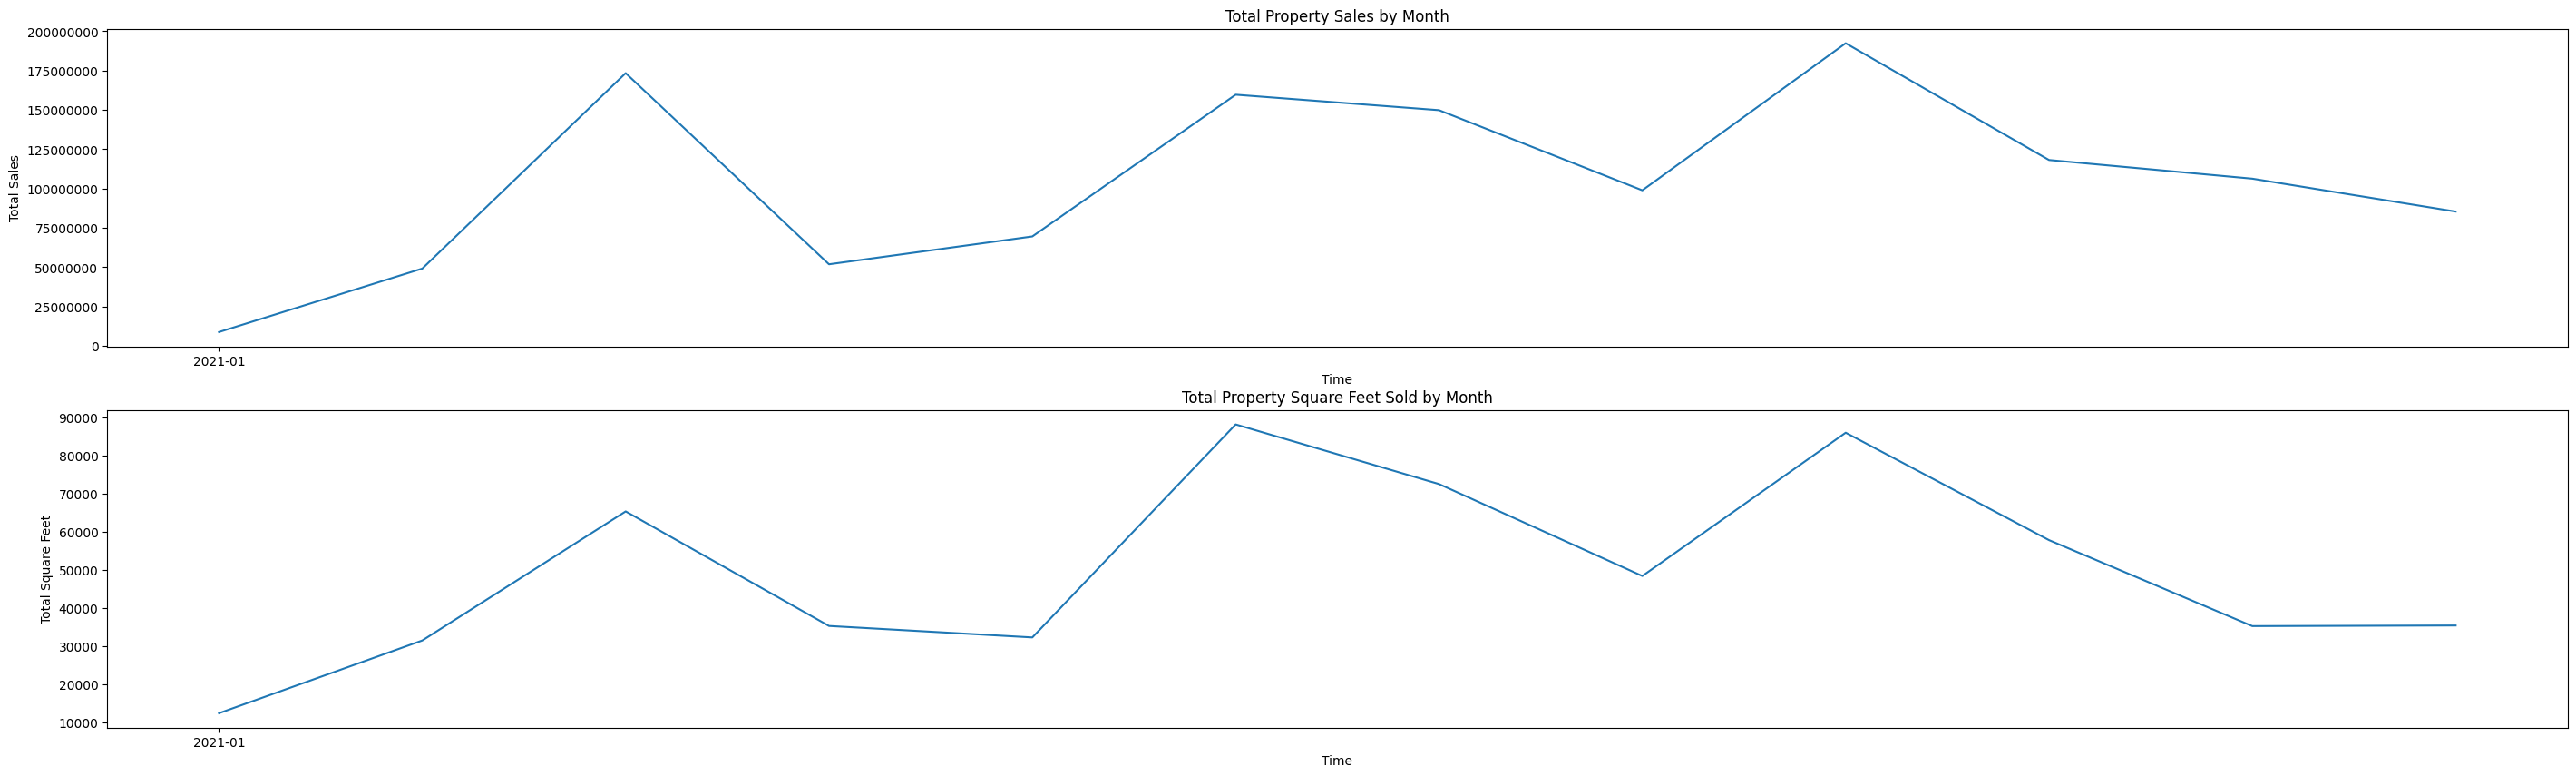

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(35, 10))
plt.sca(ax1)
plt.xticks(np.arange(0, 15 * 12, step=12))
plt.ticklabel_format(style="plain", axis="y")
sns.lineplot(x="month", y="total_sales", data=df_pandas)
plt.ylabel("Total Sales")
plt.xlabel("Time")
plt.title("Total Property Sales by Month")

plt.sca(ax2)
plt.xticks(np.arange(0, 15 * 12, step=12))
plt.ticklabel_format(style="plain", axis="y")
sns.lineplot(x="month", y="square_feet", data=df_pandas)
plt.ylabel("Total Square Feet")
plt.xlabel("Time")
plt.title("Total Property Square Feet Sold by Month")
plt.show()

# Prediction
